# Setup



In [1]:
using Plots
using FFTW
using DelimitedFiles

include("spinning_compass_functions.jl");

# Compass in a magnetic field



### Exemplary Dynamics

Trajectories in Time domain

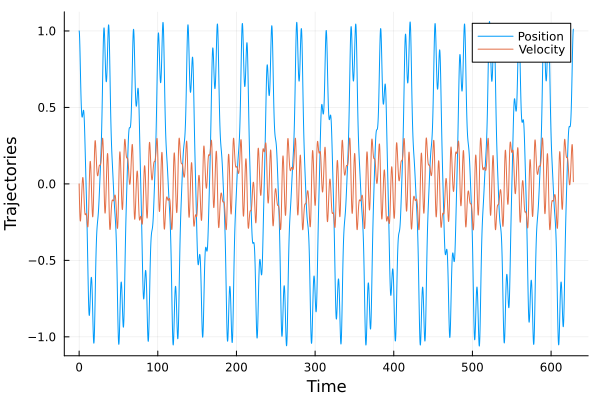

In [8]:
# Function parameters
B = 0.3
ω = 1.0
drive_period = 2*π / ω

# Simulation parameters
t_initial, t_final = 0.0, 100*drive_period
Nsteps = 10000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);




plot(tpoints, xpoints, label="Position")
plot!(tpoints, vpoints, label="Velocity")

xlabel!("Time")
ylabel!("Trajectories")


Phase Space trajectories

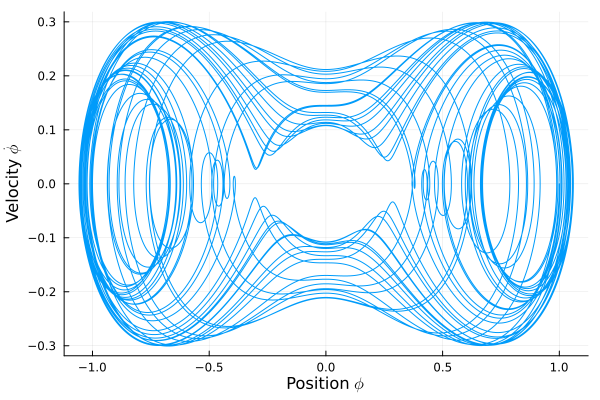

In [67]:
# Function parameters
B = 0.3
ω = 1.0
drive_period = 2*π / ω

# Simulation parameters
t_initial, t_final = 0.0, 100*drive_period
Nsteps = 20000
time_param = (t_initial, t_final, Nsteps)


# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
B = 0.3
ω = 1.0
f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);



plot(xpoints, vpoints, label="")

ylabel!(raw"Velocity $\dot\phi$")
xlabel!(raw"Position $\phi$")


Benchmark: Reduction of spin compass as harmonic oscillator in $\omega = 0$ limit

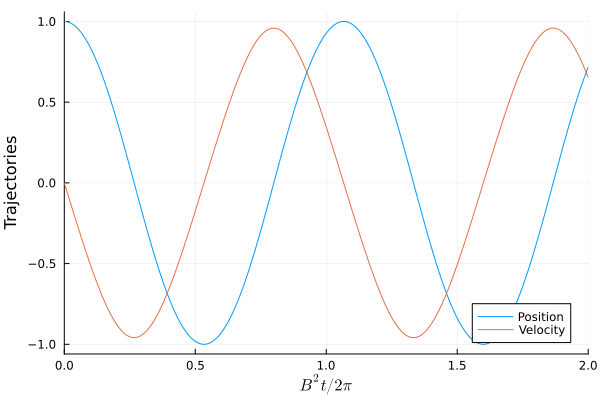

In [17]:
# Function parameters
B = 1.0
ω = 0.0

# Simulation parameters
t_initial, t_final = 0.0, 100.0 
Nsteps = 10000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);




plot(tpoints.*(B^0.5 / (2*π) ) , xpoints, label="Position", xlims = (0.0, 2.0))
plot!(tpoints.*(B^0.5 / (2*π) ), vpoints, label="Velocity", xlims = (0.0, 2.0))

xlabel!(raw"$B^{2} t/2\pi$")
ylabel!("Trajectories")


Benchmark: Stationary spin compass in absence of magnetic field, $B = 0$

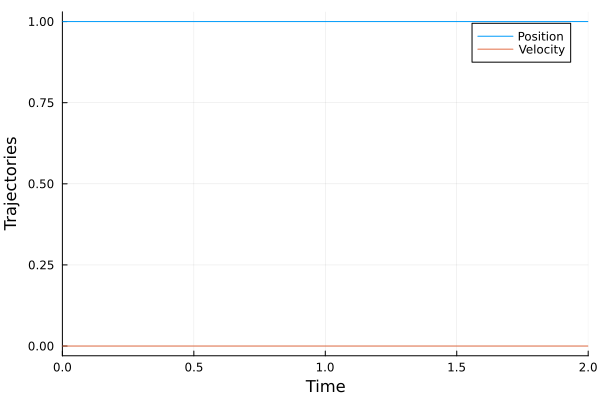

In [16]:
# Function parameters
B = 0.0
ω = 0.0

# Simulation parameters
t_initial, t_final = 0.0, 100.0 
Nsteps = 10000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


f(r, t) = Spin_compass.EOM_compass(r, t, B, ω)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);




plot(tpoints, xpoints, label="Position", xlims = (0.0, 2.0))
plot!(tpoints, vpoints, label="Velocity", xlims = (0.0, 2.0))

xlabel!("Time")
ylabel!("Trajectories")


# Harmonic oscillator

- Intended for testing the RK4 code  



In [50]:
function hooke(r, t, k)
    (x, v) = r
    dxdt = v
    dvdt = -k*x
    return [dxdt, dvdt]
end

hooke (generic function with 1 method)

Sample Dynamics of Oscillator

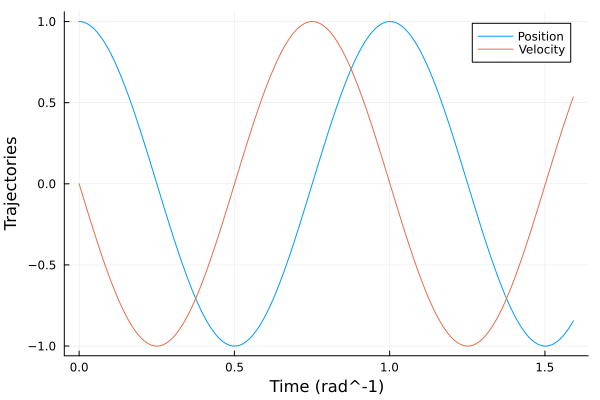

In [78]:
# Simulation parameters
t_initial, t_final = 0.0, 10.0
Nsteps = 1000
time_param = (t_initial, t_final, Nsteps)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);



plot(tpoints.*(1 / (2*π)) , xpoints, label="Position")
plot!(tpoints.*(1 / (2*π)), vpoints, label="Velocity")

xlabel!("Time (rad^-1)")
ylabel!("Trajectories")

#### FFT SPectrum
For calculating the Fourier spectrum of a single trajectory, make sure that $t_{final}$ is an integer multiple of the driving period or the natural frequency. This is to avoid aliasing and we have sufficient points for the FFT. -Roy

Sample of FFT Frequency spectrum of Hooke spring.

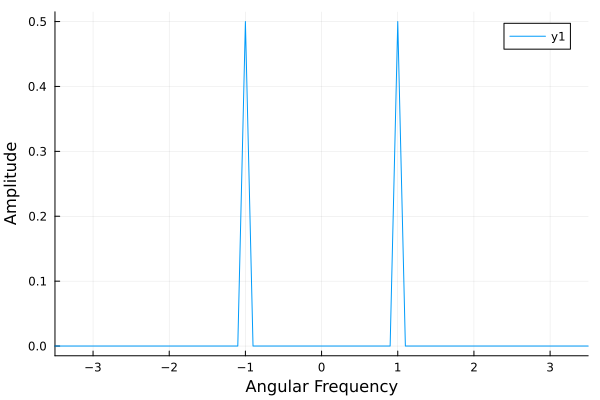

In [52]:
# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)


# Simulation parameters
t_initial, t_final = 0.0, 10 * (2*π) / k^0.5
Nsteps = 1001
time_param = (t_initial, t_final, Nsteps)
sampling_rate = Nsteps / abs(t_final - t_initial)


(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);

fourier_xpoints = fftshift(fft(xpoints))
fourier_freq = fftshift(fftfreq(Nsteps, sampling_rate)).*(2*π) #conversion of hertz to rad

power_spectrum = abs.(fourier_xpoints).^2
normalized_power = power_spectrum./sum(power_spectrum)

plot(fourier_freq, normalized_power, xlims = (-3.5, 3.5))
xlabel!("Angular Frequency")
ylabel!("Amplitude")


Calculation of Spectral entropy

In [4]:
# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]


# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)


# Simulation parameters
t_initial, t_final = 0.0, 10 * (2*π) / k^0.5
Nsteps = 1001
time_param = (t_initial, t_final, Nsteps)
sampling_rate = Nsteps / abs(t_final - t_initial)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r);


#Fourier transform
fourier_xpoints = fftshift(fft(xpoints))
fourier_freq = fftshift(fftfreq(Nsteps, sampling_rate)).*(2*π) #conversion of hertz to rad

#calculation of spectral entropy
power_xpoints = abs.(fourier_xpoints).^2
power_total = sum(power_xpoints)
normalized_power = (power_xpoints./power_total) 
#the two is on the normalized power to make the spectral entropy zero for clean oscillations


spec_entropy = 0
for probability in normalized_power
    if probability > 1e-5
        spec_entropy += probability*log2(probability)
    else
        spec_entropy += 0
    end
end
spec_entropy /= -1 * log2(length(normalized_power))

println("Spectral Entropy: ", spec_entropy);
println("Spectral Entropy using spectral_entropy function: ", Chaos_checking.spectral_entropy(xpoints));

Spectral Entropy: 0.10032881506185602
Spectral Entropy using spectral_entropy function: 0.10032881506185602


# Unitless Spinning Compass

Exemplary Dynamics

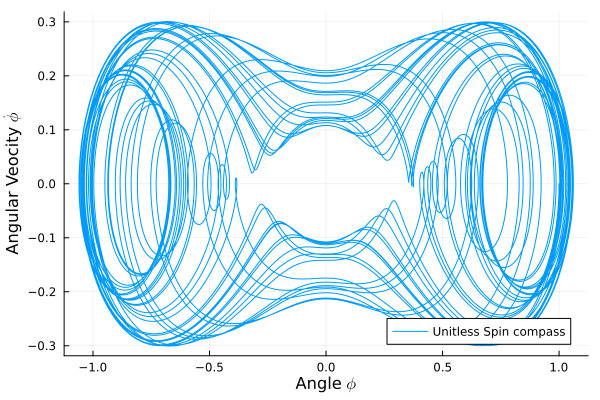

In [66]:
# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

#Function parameters
λ = (2 * 0.3 / 1)^0.5
f(r, t) = Spin_compass.EOM_compass_unitless(r, t, λ)

#time paramaters (T = ωt)
t_initial, t_final, Nsteps = 0.0, 100.0*2*π, 10000
time_param = (t_initial, t_final, Nsteps)

(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r)

plot(xpoints, vpoints, label="Unitless Spin compass")

xlabel!(raw"Angle $\phi$")
ylabel!(raw"Angular Veocity $\dot{\phi}$")


Poincare map using the unitless spin compass eom

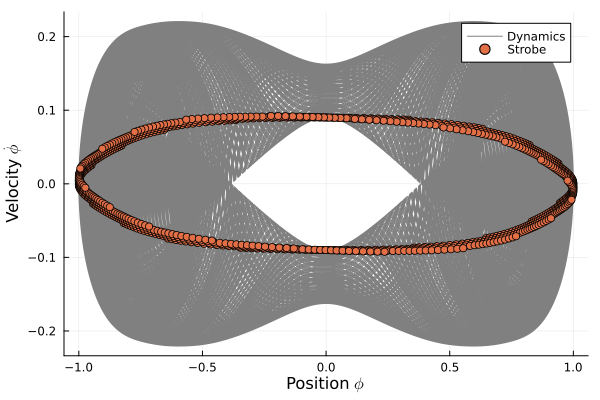

In [10]:
# Initial conditions
x0, v0 = 1, 0.0
r = [x0, v0]

#Function parameters
λ = 0.7
f(r, t) = Spin_compass.EOM_compass_unitless(r, t, λ)

#time paramaters (T = ωt)
t_initial, t_final, Nsteps = 0.0, 1000*2*π, 100000
time_step = abs(t_final - t_initial) / Nsteps
time_param = (t_initial, t_final, Nsteps)


(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r)

#bounding xpoints
cartesian_proj_x = cos.(xpoints)
cartesian_proj_y = sin.(xpoints)

xpoints = atan.(cartesian_proj_y, cartesian_proj_x)

#Poincare map construction
x_strobe, v_strobe = [], []
@simd for i in 1:length(tpoints)
    time_error = tpoints[i] % 2π
    if time_error <= time_step
        append!(x_strobe, xpoints[i])
        append!(v_strobe, vpoints[i])
    end
end




plot(xpoints, vpoints, label = "Dynamics", color = "gray", )
scatter!(x_strobe, v_strobe , label="Strobe", )

xlabel!(raw"Position $\phi$")
ylabel!(raw"Velocity $\dot{\phi}$")

savefig("image_results/torus from stroboscopic dynamics for lambda = 0.7.png")


#just to make the plot appear inline on the notebook
plot(xpoints, vpoints, label = "Dynamics", color = "gray", )
scatter!(x_strobe, v_strobe , label="Strobe", )

xlabel!(raw"Position $\phi$")
ylabel!(raw"Velocity $\dot{\phi}$")

Exemplary dynamics of the $\phi$ projected at the $x$-axis ($x = \cos \phi$)

0.08735000148729408


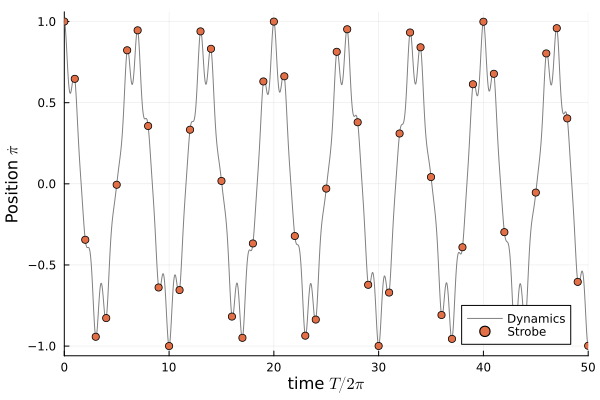

In [13]:
# Initial conditions
x0, v0 = 1, 0.0
r = [x0, v0]

#Function parameters
λ = 0.7
f(r, t) = Spin_compass.EOM_compass_unitless(r, t, λ)

#time paramaters (T = ωt)
t_initial, t_final, Nsteps = 0.0, 100*2*π, 20000
time_step = abs(t_final - t_initial) / Nsteps
time_param = (t_initial, t_final, Nsteps)


(tpoints, xpoints, vpoints) = Spin_compass.RK4(f, time_param, r)

#bounding xpoints
cartesian_proj_x = cos.(xpoints)
cartesian_proj_y = sin.(xpoints)

xpoints = atan.(cartesian_proj_y, cartesian_proj_x)


#stroboscopic dynamics of xpoints
(x_strobe, v_strobe) = Chaos_checking.stroboscope_dynamics(xpoints, vpoints, time_param)


plot( tpoints ./ (2*π), xpoints, label = "Dynamics", color = "gray", xlims = (0.0, 50.0))
scatter!(range(0, 100), x_strobe, label = "Strobe", xlims = (0.0, 50.0))


xlabel!(raw"time $T / 2π$")
ylabel!(raw"Position $\dot{\phi}$")

savefig("image_results/dynamics of phi for lambda = 0.7.png")


println(Chaos_checking.spectral_entropy(xpoints))

#just to make the plot appear inline on the notebook
plot( tpoints ./ (2*π), xpoints, label = "Dynamics", color = "gray", xlims = (0.0, 50.0))
scatter!(range(0, 100), x_strobe, label = "Strobe", xlims = (0.0, 50.0))

xlabel!(raw"time $T / 2π$")
ylabel!(raw"Position $\dot{\pi}$")


# Spectral Entropy Scans

## $\lambda$ Spectral Entropy Linear Scan

Data Generation

In [4]:
time_step = 0.01
t_initial, t_final= 0.0, 500*2*π
Nsteps = Int64(floor(abs(t_final - t_initial) / time_step ))

time_param = (t_initial, t_final, Nsteps)

lambda_initial, lambda_final, resolution = 0.3, 1.5, 100
scan_param = (lambda_initial, lambda_final, resolution)

save_filename = "raw_data/entropy lambda scan.txt"

@time Phase_diagram.lambda_linear_scan_saver(time_param, scan_param, save_filename)


Scan starting...
Number of Rows Done: 10
Number of Rows Remaining: 90
Number of Rows Done: 20
Number of Rows Remaining: 80
Number of Rows Done: 30
Number of Rows Remaining: 70
Number of Rows Done: 40
Number of Rows Remaining: 60
Number of Rows Done: 50
Number of Rows Remaining: 50
Number of Rows Done: 60
Number of Rows Remaining: 40
Number of Rows Done: 70
Number of Rows Remaining: 30
Number of Rows Done: 80
Number of Rows Remaining: 20
Number of Rows Done: 90
Number of Rows Remaining: 10
Number of Rows Done: 100
Number of Rows Remaining: 0
Scan completed!
 75.809454 seconds (502.66 M allocations: 40.494 GiB, 12.69% gc time)


Spectral Entropy Plot

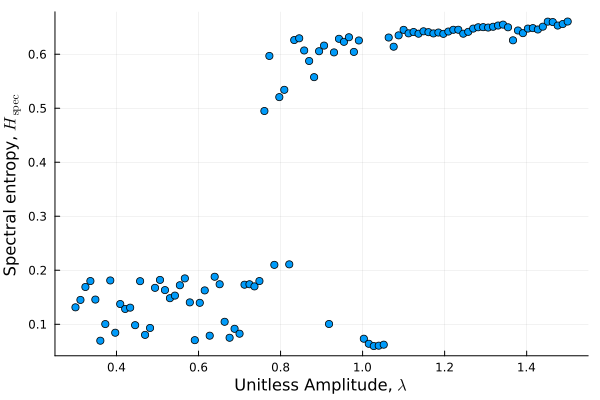

In [5]:
save_filename = "raw_data/entropy lambda scan.txt"

lambda_initial, lambda_final, resolution = 0.3, 1.5, 100
lambda_sample_array = range(lambda_initial, lambda_final, resolution)
lambda_spec_entropy_scan_data = readdlm(save_filename)

scatter(lambda_sample_array, lambda_spec_entropy_scan_data, xlims = (0.25, 1.55), label = "")
xlabel!(raw"Unitless Amplitude, $\lambda$")
ylabel!(raw"Spectral entropy, $H_{\mathrm{spec}}$")

### Period doubling BIfurcation Diagram

Data Generation

In [2]:
time_step = 0.01
t_initial, t_final= 0.0, 100*2*π
Nsteps = Int64(floor(abs(t_final - t_initial) / time_step ))
lambda_initial, lambda_final, resolution = 0.3, 1.5, 100

time_param = (t_initial, t_final, Nsteps)
scan_param = (lambda_initial, lambda_final, resolution)

freq_filename = "raw_data/frequncy spectrum lambda scan.txt"
power_spec_filename = "raw_data/power spectrum lambda scan.txt"

Phase_diagram.normalized_power_scan_saver(time_param, scan_param, freq_filename, power_spec_filename)


Scan starting...
Number of Rows Done: 10
Number of Rows Remaining: 90
Number of Rows Done: 20
Number of Rows Remaining: 80
Number of Rows Done: 30
Number of Rows Remaining: 70
Number of Rows Done: 40
Number of Rows Remaining: 60
Number of Rows Done: 50
Number of Rows Remaining: 50
Number of Rows Done: 60
Number of Rows Remaining: 40
Number of Rows Done: 70
Number of Rows Remaining: 30
Number of Rows Done: 80
Number of Rows Remaining: 20
Number of Rows Done: 90
Number of Rows Remaining: 10
Number of Rows Done: 100
Number of Rows Remaining: 0
Scan completed!


Power Spectrum Plot (I can't make this work yet T-T) - You can find the heatmap at the `Heatmap_plots.ipynb`

In [ ]:
# lambda_initial, lambda_final, resolution = 0.3, 1.5, 10
# lambda_sample_array = [i for i in range(lambda_initial, lambda_final, resolution)]

# freq_spectrum_array = readdlm("raw_data/frequncy spectrum lambda scan.txt")
# power_spectrum_array = readdlm("raw_data/power spectrum lambda scan.txt")


# heatmap(lambda_sample_array, freq_spectrum_array, power_spectrum_array, clim = (0, 0.1),)